<a href="https://colab.research.google.com/github/thoughtsociety/colab-notebooks/blob/master/Facial_Emotion_Detection_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Emotion Detection with Deep Learning

### Will experiment with the cv2 library
### and the model built by Priya Dwivedi from her [great medium post](https://towardsdatascience.com/face-detection-recognition-and-emotion-detection-in-8-lines-of-code-b2ce32d4d5de)

### Mount GDrive for assets

Must be run every time the notebook is initialized

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Do our imports

#### There is also a patch for google colab to use cv2_imshow correctly in a notebook

In [0]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
# import face_recognition
import keras
from keras.models import load_model
import cv2
import warnings
import time
from google.colab.patches import cv2_imshow # fixes incompatibility of cv2 and jupyter
warnings.filterwarnings('ignore')
face_path = "/content/"
model_path = "/content/drive/My Drive/Colab Notebooks/models/"
gdrive_path = "/content/drive/My Drive/Colab Notebooks/"


In [38]:
!pwd

/content


In [0]:
# We had a bunch of images saved on gdrive as a zip so we needed to unzip them locally on our colab instance
!unzip /content/drive/'My Drive'/faces/faces.zip

In [0]:
# This is where the emotion equates to a predicted class value
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}

In [0]:
# Load in the face emotional model provided by Priya Dwivedi http://www.deeplearninganalytics.org/
# The model was trained on fer2013 labeled face emotion image data set
model = load_model(model_path+"model_v6_23.hdf5")

## Emotion Detection Function

Function to do the emotion detection in one cell

**Pass in the image**

**Resize image : This model prefers 48x48 pixel grayscale images**

In [0]:
def emotion_detection(image):
  #resized_image = cv2.resize(image, None, (48,48),interpolation=cv2.INTER_AREA)
  resized_image = cv2.resize(image, (48,48))
  #cv2_imshow(resized_image)
# Reshape for 4D convolution input to model
  reshaped_resized_image = np.reshape(resized_image,[1,48,48,1])
# Do the prediction based on the emotional model
  predicted_class = np.argmax(model.predict(reshaped_resized_image))
# Get the emotion string from the dictionary with predicted_class as index
  label_map = dict((v,k) for k,v in emotion_dict.items()) 
  predicted_label = label_map[predicted_class]
  #print('predicted class = ',predicted_class)
# Return the emotion string
  return(predicted_label)

In [0]:
# Function to build a list of images to submit to emotion_detection() and show the image with the emotion
# Provide a list of image file names and a scale factor (sf) just to show the images
def detect_emotions_from_images(image_list,sf):
  for i in image_list:
    cur_image = i
    print(face_path+i)
    image = cv2.imread(face_path+cur_image,cv2.IMREAD_GRAYSCALE)
    emotion = emotion_detection(image)
    print(cur_image+" : ",emotion,"\n")
    image = cv2.resize(image, None, fx=sf, fy=sf,interpolation=cv2.INTER_AREA)
   
    cv2_imshow(image)
    print("\n")

In [0]:
# The image lists for experimentation

img_list = ['39.jpg','happy.jpg','suprise-guy.jpg','125.jpg','140.jpg','16.jpg','142.jpg','4.jpg','disgust-man-2.jpeg','happy-old-woman-2.jpg','happy-girl.jpg','angry-man-1.jpg','1950s-sad-boy.jpg','fearful-woman-1.jpg']
img_list_2 = ['happy.jpg','sad2.jpg','surprise.jpg','fear.jpg']
img_list_3 = ['125.jpg','140.jpg','16.jpg','142.jpg','4.jpg']
img_list_4 = ['trump-anger-1.png','trump-fear-1.png','trump-neutral1.png']
img_list_all = img_list+img_list_4

/content/39.jpg
39.jpg :  Surprise 





/content/happy.jpg
happy.jpg :  Happy 



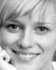



/content/suprise-guy.jpg
suprise-guy.jpg :  Fear 



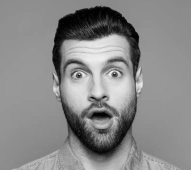



/content/125.jpg
125.jpg :  Fear 



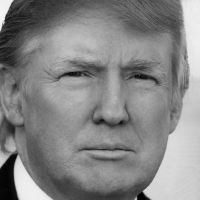



/content/140.jpg
140.jpg :  Surprise 



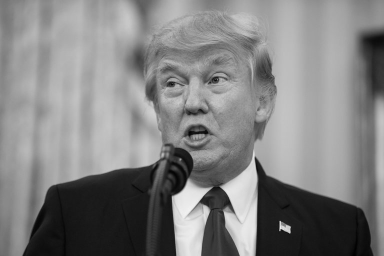



/content/16.jpg
16.jpg :  Angry 



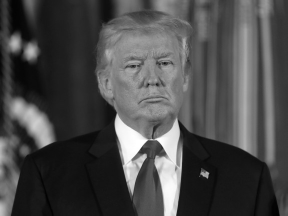



/content/142.jpg
142.jpg :  Angry 



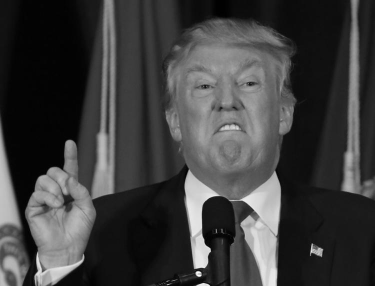



/content/4.jpg
4.jpg :  Fear 



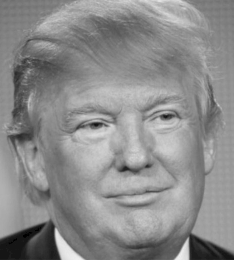



/content/disgust-man-2.jpeg
disgust-man-2.jpeg :  Fear 



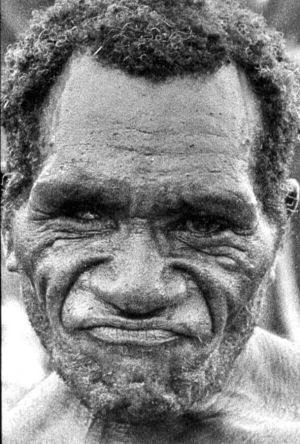



/content/happy-old-woman-2.jpg
happy-old-woman-2.jpg :  Fear 



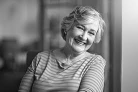



/content/happy-girl.jpg
happy-girl.jpg :  Angry 



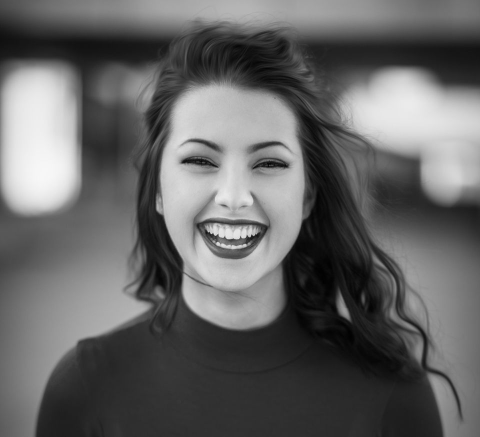



/content/angry-man-1.jpg
angry-man-1.jpg :  Angry 



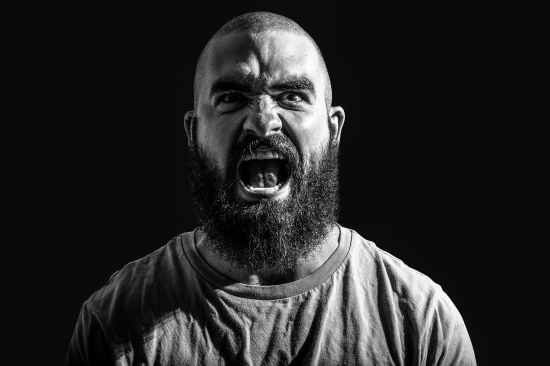



/content/1950s-sad-boy.jpg
1950s-sad-boy.jpg :  Fear 



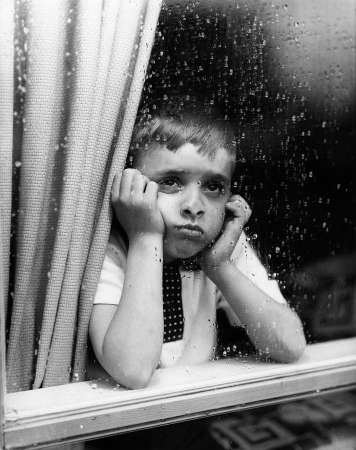



/content/fearful-woman-1.jpg
fearful-woman-1.jpg :  Surprise 



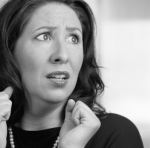



/content/trump-anger-1.png
trump-anger-1.png :  Fear 



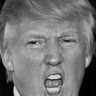



/content/trump-fear-1.png
trump-fear-1.png :  Angry 



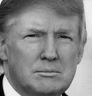



/content/trump-neutral1.png
trump-neutral1.png :  Fear 



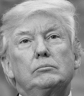

In [54]:
# Call this with the list and a scale factor to view the images after analysis
detect_emotions_from_images(img_list_all,0.5)